In [12]:
import pandas as pd
import pandas_profiling
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
#from sklearn.preprocessing import MinMaxScale

In [2]:
songs_full=pd.read_csv('SpotifyFeatures.csv', index_col=0)
songs_full.head()

In [3]:
#matplotlib.pyplot.hist(songs_full['popularity'], bins=20)
#sns.distplot(songs_full['popularity'])

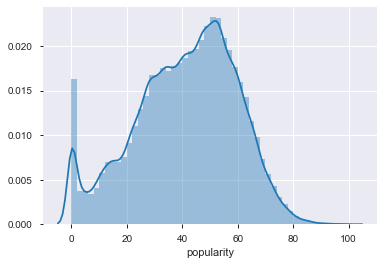

In [5]:
sns.distplot(songs_full['popularity'])

In [9]:
Popularity = pd.DataFrame(songs_full['popularity'])
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(Popularity)
    Sum_of_squared_distances.append(km.inertia_)

In [16]:
%matplotlib

Using matplotlib backend: Qt5Agg


In [19]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [18]:
quantile=songs_full['popularity'].quantile(np.arange(0, 1.01, 0.01).tolist())
quantile=quantile.reset_index()
quantile.rename(columns={'index':'quantile'}, inplace=True)
sns.lineplot(quantile['popularity'],quantile['quantile'])

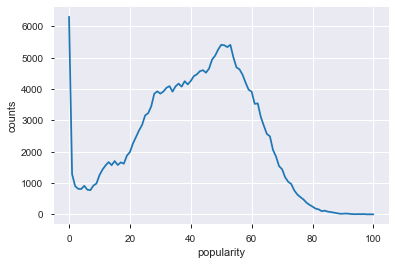

In [8]:
counts=songs_full['popularity'].value_counts()
counts=counts.reset_index()
counts.rename(columns={'popularity':'counts','index':'popularity'}, inplace=True)
sns.lineplot(counts['popularity'],counts['counts'])

In [9]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(quantile)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [11]:
quantile['cluster']=kmeans.predict(quantile)

In [12]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(counts)
counts['cluster']=kmeans.predict(counts)

In [5]:
#counts.head()

In [6]:
#quantile.head()

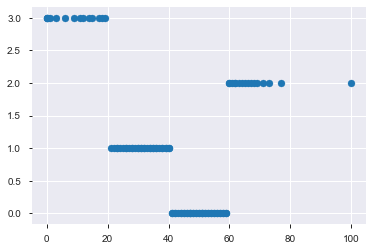

In [15]:
matplotlib.pyplot.scatter(quantile['popularity'],quantile['cluster'])

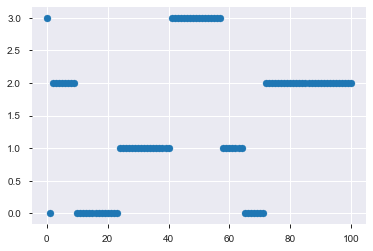

In [16]:
matplotlib.pyplot.scatter(counts['popularity'],counts['cluster'])

In [20]:
mix=a = quantile.merge(counts, left_on=['popularity'], right_on=['popularity'])

In [22]:
mix.drop("cluster_x", axis=1, inplace=True)
mix.drop("cluster_y", axis=1, inplace=True)

In [24]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(mix)
mix['cluster']=kmeans.predict(mix)

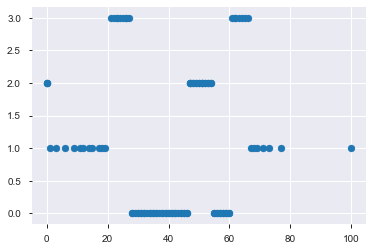

In [26]:
mix.head()
matplotlib.pyplot.scatter(mix['popularity'],mix['cluster'])